### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import matplotlib.pyplot as plt



tiendas = [tienda, tienda2, tienda3, tienda4]
ingreso_total = [sum(tienda["Precio"]) for tienda in tiendas]

# Listar las tiendas
for ingreso in range(len(ingreso_total)):
    print(f"Tienda {ingreso+1}: {ingreso_total[ingreso]}")


Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


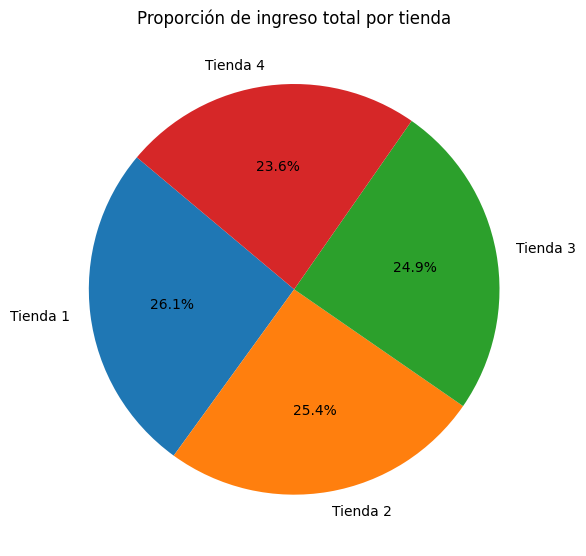

In [ ]:
# Crear un DataFrame para graficar con seaborn
df_facturacion = pd.DataFrame({
    'Tienda': [f'Tienda {i+1}' for i in range(len(ingreso_total))],
    'Ingreso Total': ingreso_total
})

plt.figure(figsize=(6,6))
plt.pie(ingreso_total, labels=[f'Tienda {i+1}' for i in range(len(ingreso_total))], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de ingreso total por tienda')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
def contar_categorias(categorias: list) -> dict:
    res = {}
    for categoria in categorias["Categoría del Producto"]:
        res[categoria] = res.get(categoria, 0) + 1
  
    return res

ventas_por_categoria = list(map(contar_categorias, tiendas))

for categoria in range(len(ventas_por_categoria)):
    ventas_ordenadas = dict(sorted(ventas_por_categoria[categoria].items(), key=lambda item: item[1], reverse=True))    
    print(f"Tienda {categoria+1}: {ventas_ordenadas}") 



Tienda 1: {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}
Tienda 2: {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}
Tienda 3: {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}
Tienda 4: {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}


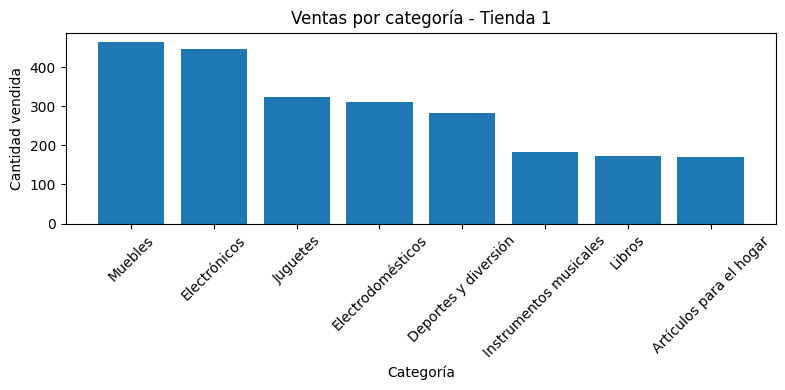

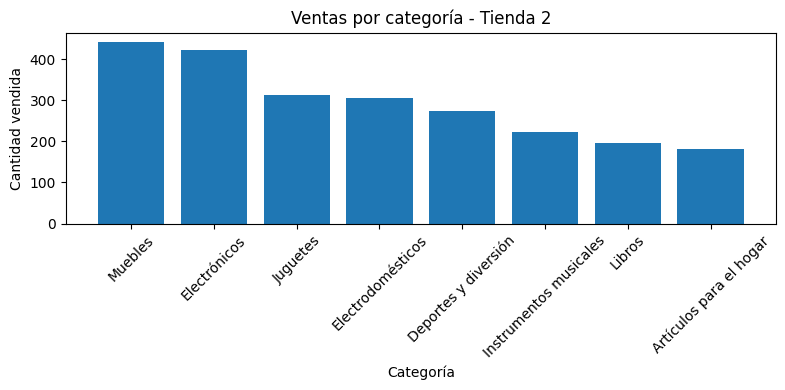

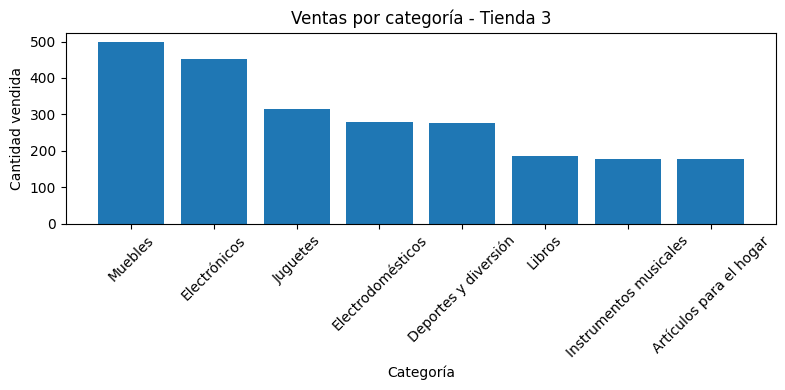

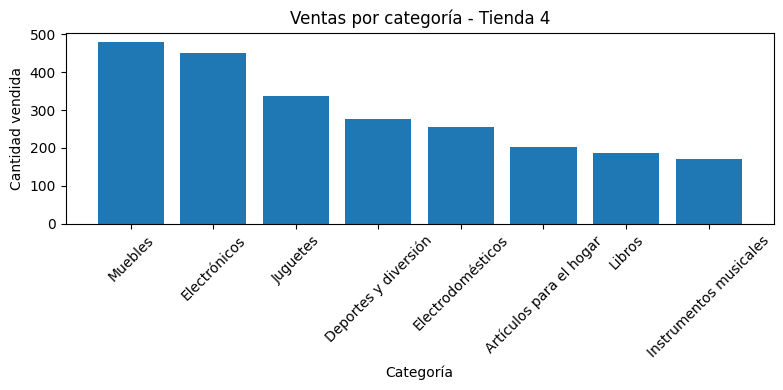

In [ ]:
import matplotlib.pyplot as plt

# Graficar ventas por categoría para cada tienda
for i, ventas in enumerate(ventas_por_categoria):
    ventas_ordenadas = dict(sorted(ventas.items(), key=lambda item: item[1], reverse=True))
    categorias = list(ventas_ordenadas.keys())
    cantidades = list(ventas_ordenadas.values())
    plt.figure(figsize=(8,4))
    plt.bar(categorias, cantidades)
    plt.title(f'Ventas por categoría - Tienda {i+1}')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = [round(sum(tienda["Calificación"])/len(tienda), 2) for tienda in tiendas]

for calificacion in range(len(calificacion_promedio)):
    print(f"Tienda {calificacion+1}: {calificacion_promedio[calificacion]}")



Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


/tmp/ipykernel_2731/945584542.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_calificacion, x='Tienda', y='Calificación Promedio', palette='mako')


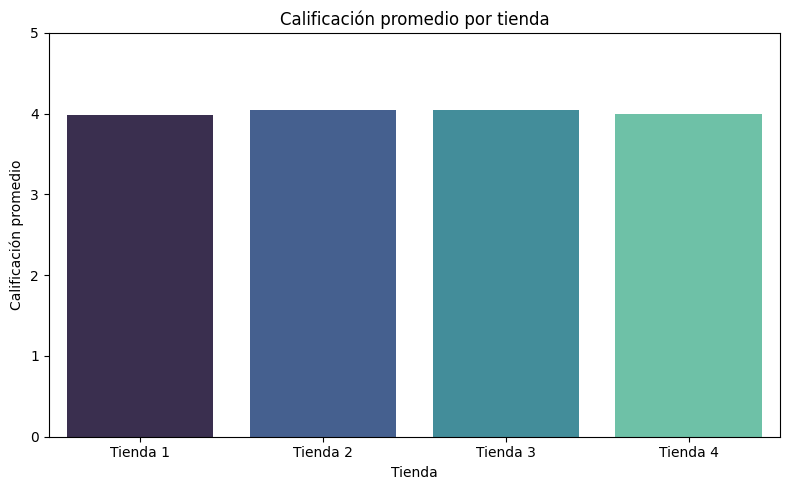

In [ ]:
df_calificacion = pd.DataFrame({
    'Tienda': [f'Tienda {i+1}' for i in range(len(calificacion_promedio))],
    'Calificación Promedio': calificacion_promedio
})

plt.figure(figsize=(8,5))
sns.barplot(data=df_calificacion, x='Tienda', y='Calificación Promedio', palette='mako')
plt.title('Calificación promedio por tienda')
plt.ylim(0, 5)
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def contar_productos(productos: list) -> dict:
    res = {}
    for producto in productos["Producto"]:
        res[producto] = res.get(producto, 0) + 1
    return res

productos_vendidos = list(map(contar_productos, tiendas))

for producto in range(len(productos_vendidos)):
    productos_ordenados_mayor = dict(sorted(productos_vendidos[producto].items(), key=lambda item: item[1], reverse=True))
    print(f"Tienda {producto+1}: {productos_ordenados_mayor}")
print('-'*1125)
for producto in range(len(productos_vendidos)):
    productos_ordenados_menor = dict(sorted(productos_vendidos[producto].items(), key=lambda item: item[1], reverse=False))
    print(f"Tienda {producto+1}: {productos_ordenados_menor}")



Tienda 1: {'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60, 'Secadora de ropa': 58, 'Bloques de construcción': 56, 'Mesa de noche': 56, 'Balón de baloncesto': 55, 'Refrigerador': 54, 'Bicicleta': 54, 'Vaso térmico': 54, 'Impresora': 54, 'Batería': 53, 'Carrito de control remoto': 52, 'Cubertería': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Guitarra eléctrica': 47, 'Silla de oficina': 46, 'Sofá reclinable': 46, 'Guitarra acústica': 46, 'Estufa': 45, 'Kit de bancas': 44, 'Cama box': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Cama king': 44, 'Smart TV': 44, 'Juego de mesa': 43, 'Set de ollas': 43, 'Smartwatch': 43, 'Balón de voleibol': 42, 'Dashboards con Power BI': 42, 'Tablet ABXY': 42, 'Set de vasos': 41, 'Sillón': 41, 'Iniciando en programación': 41, 'Asistente virtual': 40, 'Mesa de comedor': 40, 'Muñeca bebé': 40, 'Cuerda para saltar': 40, 'Dinosaurio Rex': 40, 'Ciencia de datos

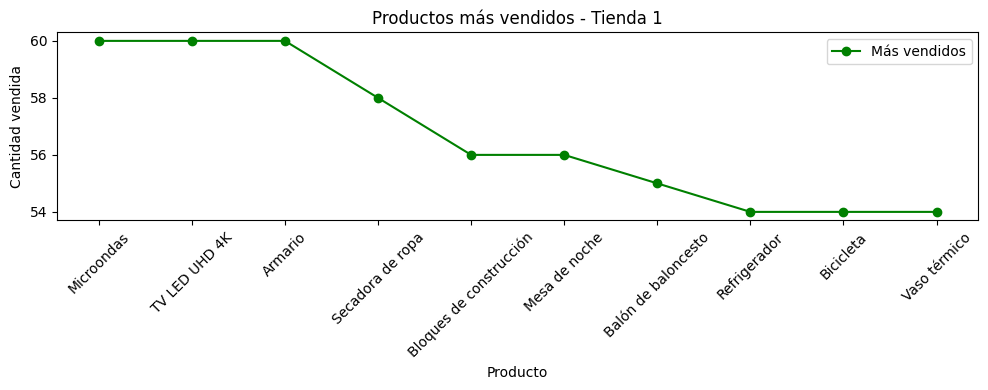

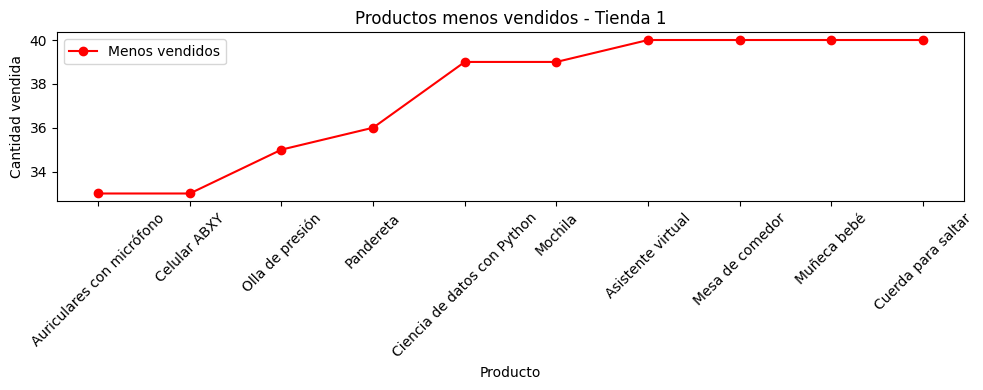

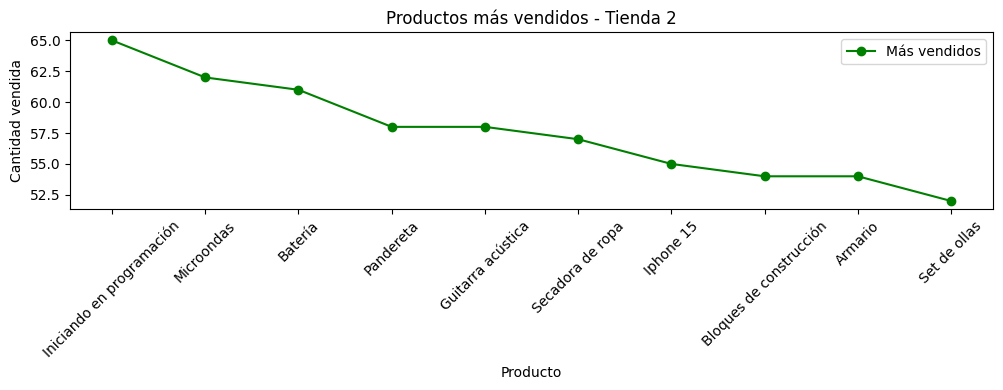

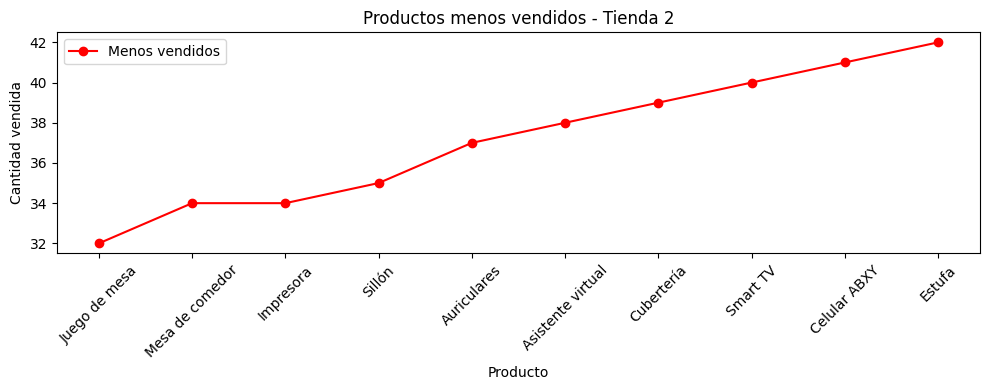

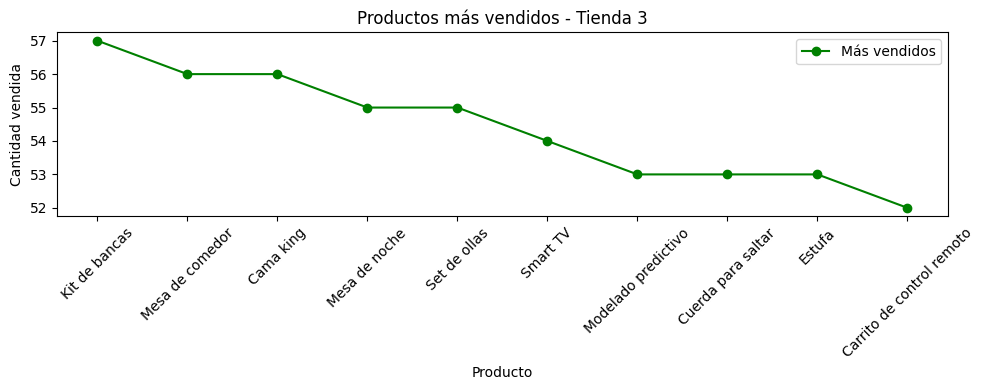

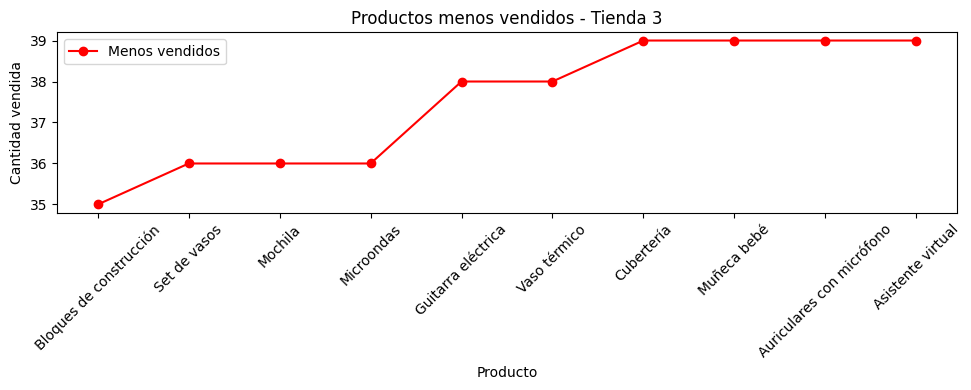

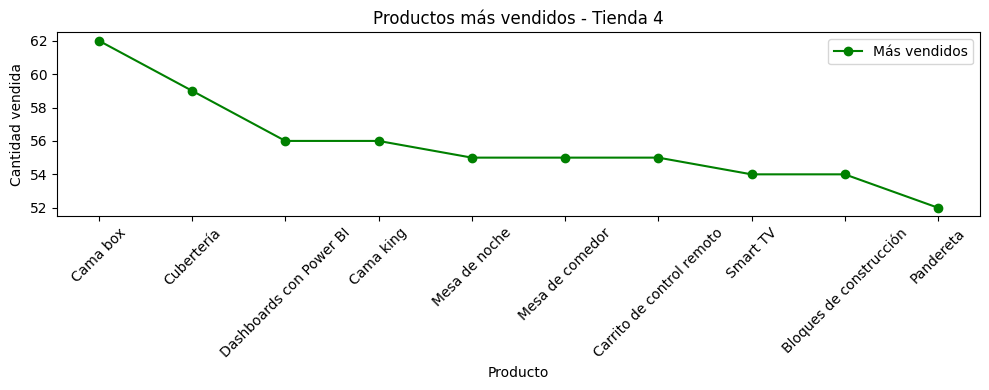

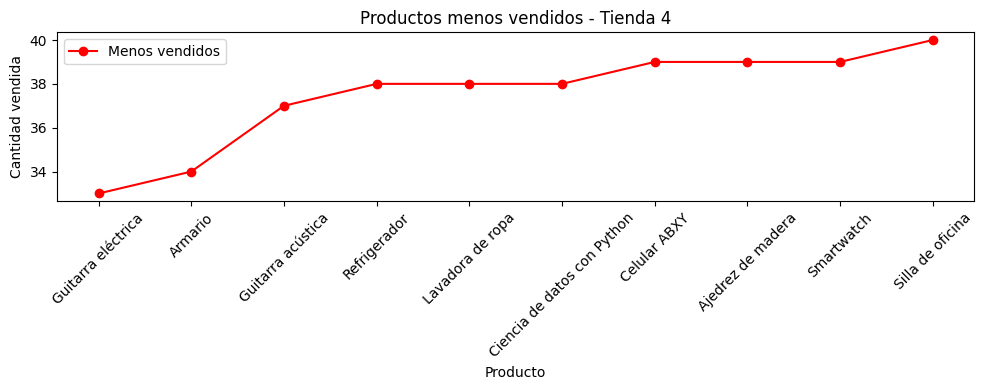

In [ ]:
for i, productos in enumerate(productos_vendidos):
    # Más vendidos
    productos_mas = dict(sorted(productos.items(), key=lambda item: item[1], reverse=True))
    nombres_mas = list(productos_mas.keys())[:10]
    cantidades_mas = list(productos_mas.values())[:10]
    plt.figure(figsize=(10,4))
    plt.plot(nombres_mas, cantidades_mas, marker='o', color='green', label='Más vendidos')
    plt.title(f'Productos más vendidos - Tienda {i+1}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Menos vendidos
    productos_menos = dict(sorted(productos.items(), key=lambda item: item[1]))
    nombres_menos = list(productos_menos.keys())[:10]
    cantidades_menos = list(productos_menos.values())[:10]
    plt.figure(figsize=(10,4))
    plt.plot(nombres_menos, cantidades_menos, marker='o', color='red', label='Menos vendidos')
    plt.title(f'Productos menos vendidos - Tienda {i+1}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [ ]:
envio_promedio = [round(sum(tienda["Costo de envío"])/len(tienda), 2) for tienda in tiendas]

for envio in range(len(envio_promedio)):
    print(f"Tienda {envio+1}: {envio_promedio[envio]}")

Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


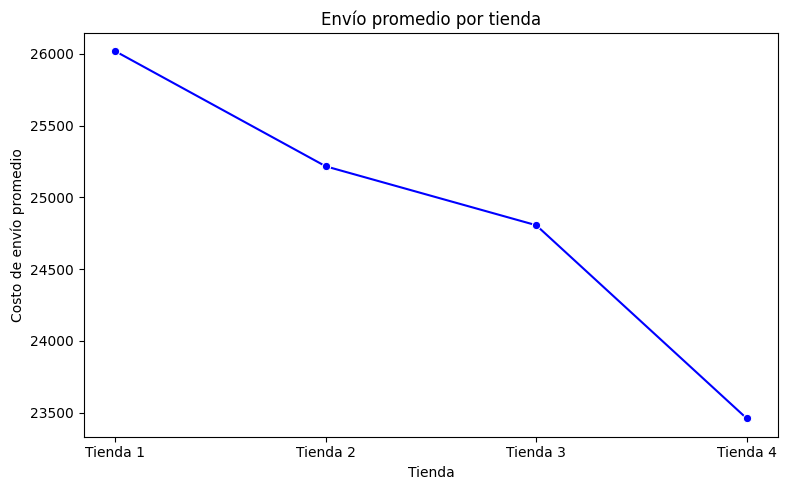

In [ ]:
df_envio = pd.DataFrame({
    'Tienda': [f'Tienda {i+1}' for i in range(len(envio_promedio))],
    'Envío Promedio': envio_promedio
})

plt.figure(figsize=(8,5))
sns.lineplot(data=df_envio, x='Tienda', y='Envío Promedio', marker='o', color='blue')
plt.title('Envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.tight_layout()
plt.show()

INFORME FINAL:

Según se presenta en las imágenes,